In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from tqdm import tqdm_notebook

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# 1. Instance Annotation

In [2]:
COCO_DIR = './COCO'
TRAIN = 'train2017'
VAL = 'val2017'
ANN_FILE = COCO_DIR + '/annotations/instances_' + TRAIN + '.json'
CAP_ANN_FILE = COCO_DIR + '/annotations/captions_' + TRAIN + '.json'

In [3]:
IMG_ANN_FILE = COCO_DIR + '/annotations/sementic_' + TRAIN + '/'

In [4]:
# initialize COCO api for instance annotations and caption annocations
coco = COCO(ANN_FILE)
coco_caps = COCO(CAP_ANN_FILE)

loading annotations into memory...
Done (t=14.90s)
creating index...
index created!
loading annotations into memory...
Done (t=1.66s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
accessory food person sports outdoor kitchen appliance furniture electronic animal indoor vehicle


In [6]:
#catids = coco.getCatIds(catNms=['person'])
catids = coco.getCatIds()
imgIds = coco.getImgIds();
imgIds = coco.getImgIds(imgIds = imgIds[0])
imgIds = [166354]

In [7]:
imgIds[np.random.randint(0,len(imgIds))]

166354

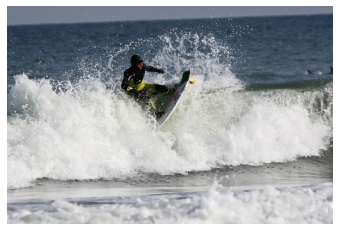

In [8]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(img['coco_url'])

plt.imshow(I); plt.axis('off'); 

In [9]:
# load and display caption annotations
capsAnnIds = coco_caps.getAnnIds(imgIds=img['id']);
capsAnns = coco_caps.loadAnns(capsAnnIds)
coco_caps.showAnns(capsAnns)

A lone surfer riding a large wave into shore.
A  man riding a surfboard in the middle of the ocean.
there is a male surfer that is riding a wave in the ocean
A surfer is performing on his surf board.
A person riding a wave on top of a surfboard.


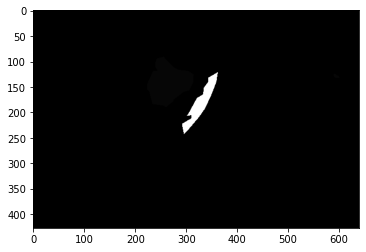

42.0

In [10]:
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=catids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
anns_img = np.zeros((img['height'],img['width']))

for ann in anns:
    anns_img = np.maximum(anns_img, coco.annToMask(ann)*ann['category_id'])
    
plt.imshow(anns_img, cmap='gray'); plt.show()
np.max(anns_img)

Height : 612 
Widht : 612 


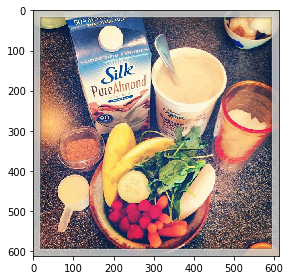

In [11]:
catids = coco.getCatIds()
imgIds = coco.getImgIds()
imgIds = coco.getImgIds(imgIds = imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(img['coco_url'])

print("Height : {} \nWidht : {} ".format(img['width'], img['height']))
io.imshow(I)
io.show()

In [12]:
# load and display caption annotations
capsAnnIds = coco_caps.getAnnIds(imgIds=img['id']);
capsAnns = coco_caps.loadAnns(capsAnnIds)
coco_caps.showAnns(capsAnns)

Bowl of fruits and vegetables sits in middle of yogurt cup Soy milk and containers of powder
Breakfast foods sit on the top of the counter.
There is a bowl with a lot if fruits in the bowl
Healthy fruits in a bowl make a good lunch alternative. 
A bow filled with fruit and carrots sitting on top of a table.
